# Lista de exercícios 3

### 1. Implemente uma MLP no framework Keras para o dataset seguindo o tutorial abaixo e apresente a curva de custo de 5 treinamentos. Não se esqueça de dividir o dataset em conjunto de treinamento e validação (70% e 30%, respectivamente).
https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Importação dos dados e análise exploratória:

In [3]:
df = pd.read_csv('wdbc.data', header=None, index_col=0)

In [4]:
df.columns = ['diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
              'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
              'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
              'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
              'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30']

In [5]:
df.head()

,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis     569 non-null object
feature_1     569 non-null float64
feature_2     569 non-null float64
feature_3     569 non-null float64
feature_4     569 non-null float64
feature_5     569 non-null float64
feature_6     569 non-null float64
feature_7     569 non-null float64
feature_8     569 non-null float64
feature_9     569 non-null float64
feature_10    569 non-null float64
feature_11    569 non-null float64
feature_12    569 non-null float64
feature_13    569 non-null float64
feature_14    569 non-null float64
feature_15    569 non-null float64
feature_16    569 non-null float64
feature_17    569 non-null float64
feature_18    569 non-null float64
feature_19    569 non-null float64
feature_20    569 non-null float64
feature_21    569 non-null float64
feature_22    569 non-null float64
feature_23    569 non-null float64
feature_24    569 non-null float64
feature_25    

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Pré processamento e divisão de datasets de treino e testes:

In [8]:
df['diagnosis'] = df.diagnosis.apply(lambda d: int(d=='M'))

In [9]:
df.head()

,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df.diagnosis, test_size=0.3, stratify=df.diagnosis, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

#### Criação e treinamento do modelo:

In [16]:
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, Adamax, Adagrad, SGD
from keras.layers import Dropout, Dense, Activation
from keras.layers.noise import AlphaDropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import regularizers

In [24]:
def plot_log(log):
    plt.plot(log.history['val_acc'])
    plt.plot(log.history['acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

In [509]:
model = Sequential()

model.add(Dense(300, input_dim=30, kernel_initializer='lecun_normal', activation='selu'#, kernel_regularizer=regularizers.l2(0.0002)
               ))
#model.add(BatchNormalization())
#model.add(Activation('selu'))
#model.add(Dropout(0.4))
model.add(AlphaDropout(0.2))

model.add(Dense(300, kernel_initializer='lecun_normal', activation='selu'#, kernel_regularizer=regularizers.l2(0.0002)
               ))
#model.add(BatchNormalization())
#model.add(Activation('selu'))
#model.add(Dropout(0.4))
model.add(AlphaDropout(0.2))

model.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('wdbc.best.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

#optimizer = Adam(lr=0.001)
optimizer = RMSprop(lr=0.0001)
#optimizer = Adagrad(lr=0.001)
#optimizer = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

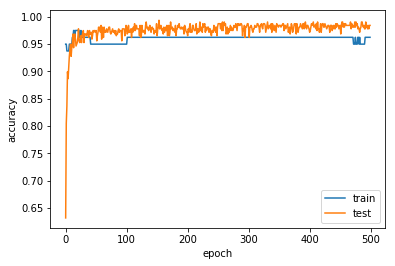

last acc: 0.984276707067
last val_acc: 0.962499976158
best val_acc: 97.50%


In [510]:
log = model.fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[checkpoint])

plot_log(log)
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])
model.load_weights("wdbc.best.h5")
scores = model.evaluate(X_val, y_val, verbose=0)
print("best val_%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#### Rodando no dataset de testes

In [511]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.42%


#### Matriz de confusão

In [527]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

In [528]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values.reshape(-1, 1), y_pred)

array([[107,   0],
       [  1,  63]])

### 2. Varie o parâmetro de batchsize (pelo menos 5) e apresente a acurácia, tempo de processamento e uso de memória para cada configuração.

In [56]:
from keras.callbacks import Callback
import os
import psutil


pid = os.getpid()
process = psutil.Process(pid)

class MemoryMetric(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if 'memory' not in logs:
            logs['memory'] = []
        logs['memory'].append(process.memory_info().rss/1024/1024)

def plot_memory(memory_history):
    plt.plot(memory_history)
    plt.ylabel('Memory (MB)')
    plt.xlabel('Epoch')
    plt.show()

def create_model(lr=0.0001):
    model = Sequential()

    model.add(Dense(300, input_dim=30, kernel_initializer='lecun_normal', activation='selu'))
    model.add(AlphaDropout(0.2))

    model.add(Dense(300, kernel_initializer='lecun_normal', activation='selu'))
    model.add(AlphaDropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = RMSprop(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#### Batch size: 20

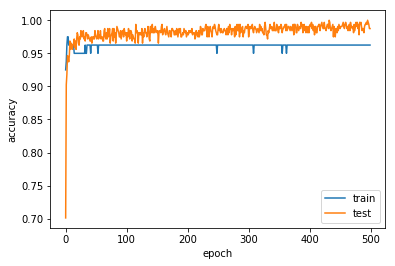

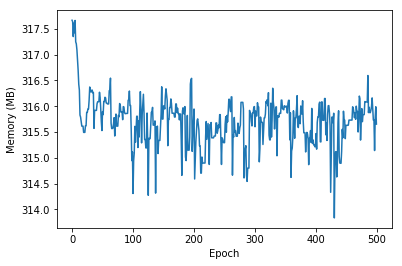

last acc: 0.987421379899
last val_acc: 0.962499991059
CPU times: user 1min 5s, sys: 5.26 s, total: 1min 10s
Wall time: 34.8 s


In [55]:
%%time
log = create_model().fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Batch size: 40

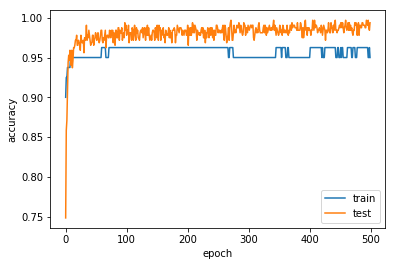

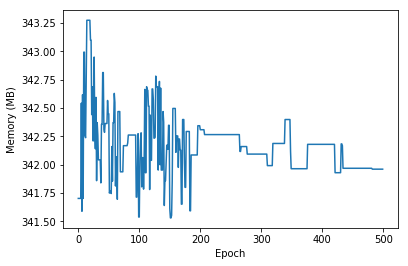

last acc: 0.993710692574
last val_acc: 0.950000017881
CPU times: user 40.8 s, sys: 3.08 s, total: 43.9 s
Wall time: 22.5 s


In [58]:
%%time
log = create_model().fit(X_train, y_train, batch_size=40, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Batch size: 60

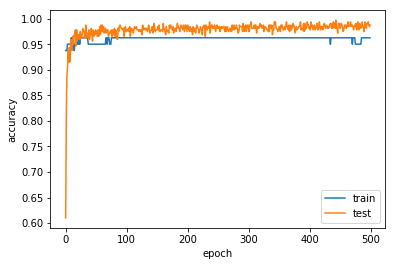

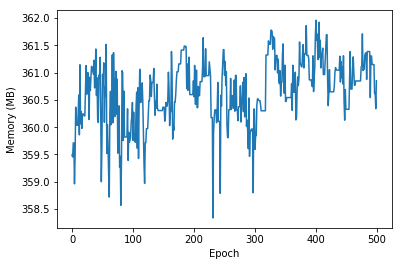

last acc: 0.987421395644
last val_acc: 0.962499976158
CPU times: user 35.2 s, sys: 2.67 s, total: 37.8 s
Wall time: 19.2 s


In [59]:
%%time
log = create_model().fit(X_train, y_train, batch_size=60, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Batch size: 80

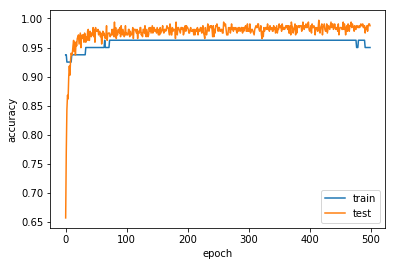

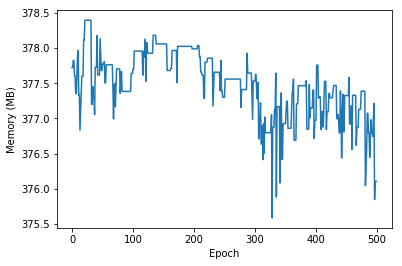

last acc: 0.987421385522
last val_acc: 0.949999988079
CPU times: user 29.3 s, sys: 2.01 s, total: 31.3 s
Wall time: 15.5 s


In [60]:
%%time
log = create_model().fit(X_train, y_train, batch_size=80, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Batch size: 100

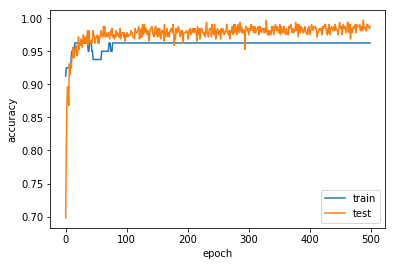

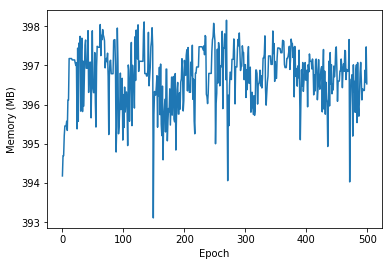

last acc: 0.987421395644
last val_acc: 0.962499976158
CPU times: user 29.6 s, sys: 2.32 s, total: 31.9 s
Wall time: 17.2 s


In [61]:
%%time
log = create_model().fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

### 3. Varie o parâmetro de taxa de aprendizado (pelo menos 5) e apresente a acurácia, tempo de processamento e uso de memória para cada configuração.

#### Taxa de aprendizado: 0.01

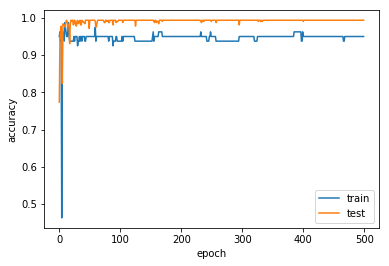

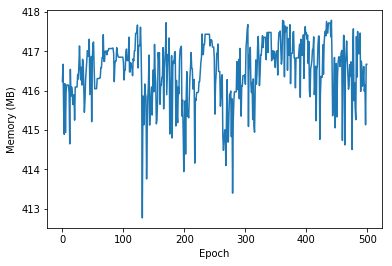

last acc: 0.993710697822
last val_acc: 0.949999988079
CPU times: user 28.9 s, sys: 2.22 s, total: 31.2 s
Wall time: 15.4 s


In [62]:
%%time
log = create_model(lr=0.01).fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Taxa de aprendizado: 0.001

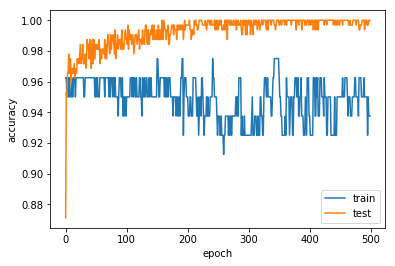

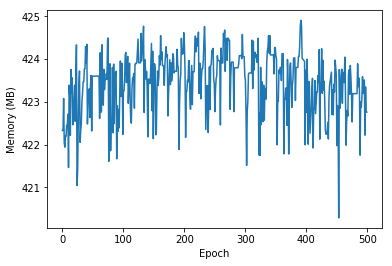

last acc: 1.0
last val_acc: 0.9375
CPU times: user 29.1 s, sys: 2.14 s, total: 31.2 s
Wall time: 15.4 s


In [63]:
%%time
log = create_model(lr=0.001).fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Taxa de aprendizado: 0.0001

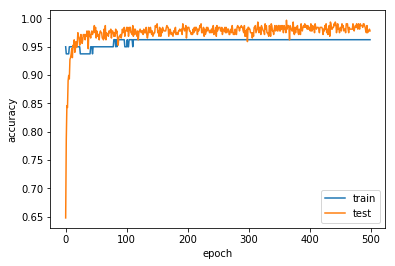

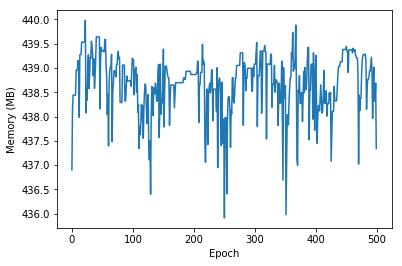

last acc: 0.977987436753
last val_acc: 0.962499976158
CPU times: user 29.1 s, sys: 2.28 s, total: 31.4 s
Wall time: 15.3 s


In [64]:
%%time
log = create_model(lr=0.0001).fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Taxa de aprendizado: 0.00001

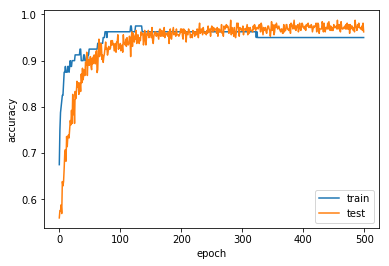

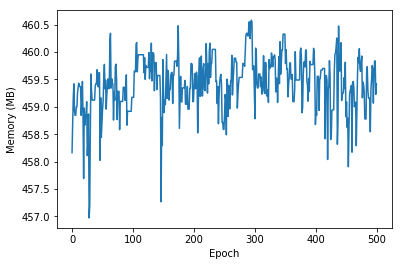

last acc: 0.962264163689
last val_acc: 0.949999988079
CPU times: user 29.9 s, sys: 2.28 s, total: 32.2 s
Wall time: 17.3 s


In [65]:
%%time
log = create_model(lr=0.00001).fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])

#### Taxa de aprendizado: 0.000001

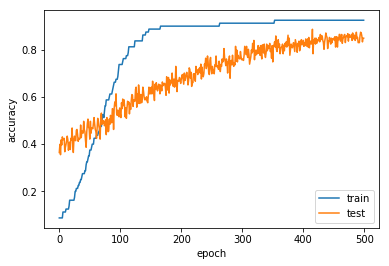

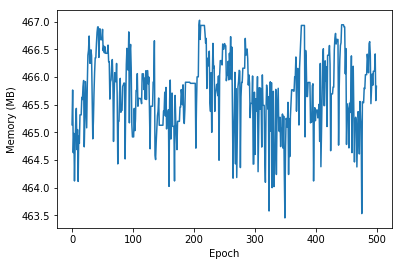

last acc: 0.849056606398
last val_acc: 0.925000011921
CPU times: user 29 s, sys: 2.4 s, total: 31.4 s
Wall time: 14.8 s


In [66]:
%%time
log = create_model(lr=0.000001).fit(X_train, y_train, batch_size=100, epochs=500, validation_data=(X_val, y_val), verbose=0, callbacks=[MemoryMetric()])
plot_log(log)
plot_memory(log.history['memory'])
print("last acc:", log.history['acc'][-1])
print("last val_acc:", log.history['val_acc'][-1])